<a href="https://colab.research.google.com/github/priyanshu-buwade/SMES_IoT_Assignments/blob/main/SMES_Earthquake_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Generate synthetic seismic data using any of seismic sensor (ADXL345 accelerometer, MMA 7361L, SM24 Geophone, or L4C Geophone) using virtual environment in tinkercad or export the seismological data available on National Center for Seismology portable of govt. of India (https://seismo.gov.in/data-portal) using python API and provide the predictive analysis using arduino board. Record the following parameters:**

#**1) Duration: The time span over which the earthquake occurs.**

#**2) Frequency: The frequency of the seismic waves.**

#**3) Magnitude: The magnitude of the earthquake.**

#**Use the matplotlib library for visualization of data using Line, Scatter, Spectrogram, Histogram and, Box plot. Send all the data and plot to an IoT platform or server using protocols like MQTT or HTTP.**

---

# **Tinkercad Circuit** -

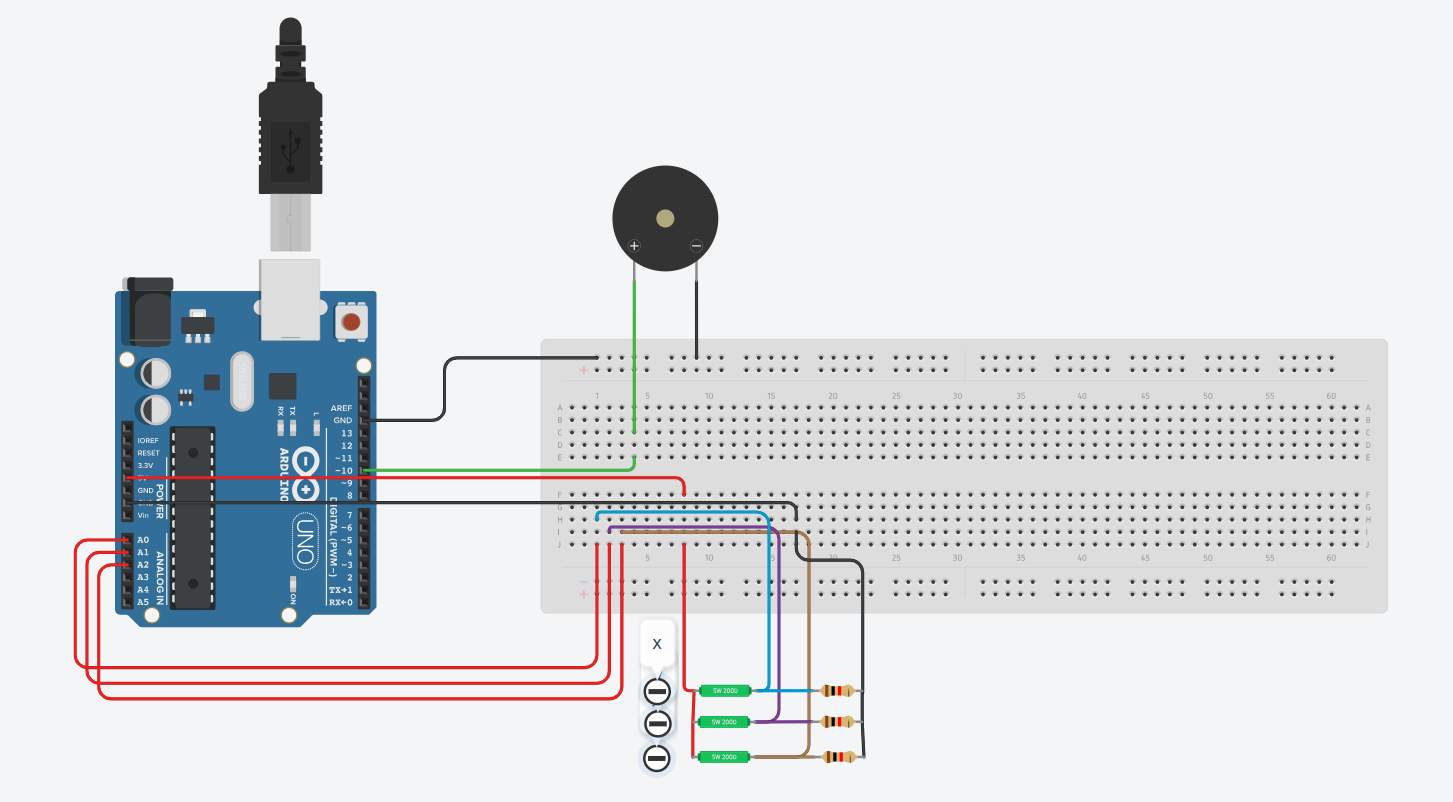

# **Circuit Diagram** -

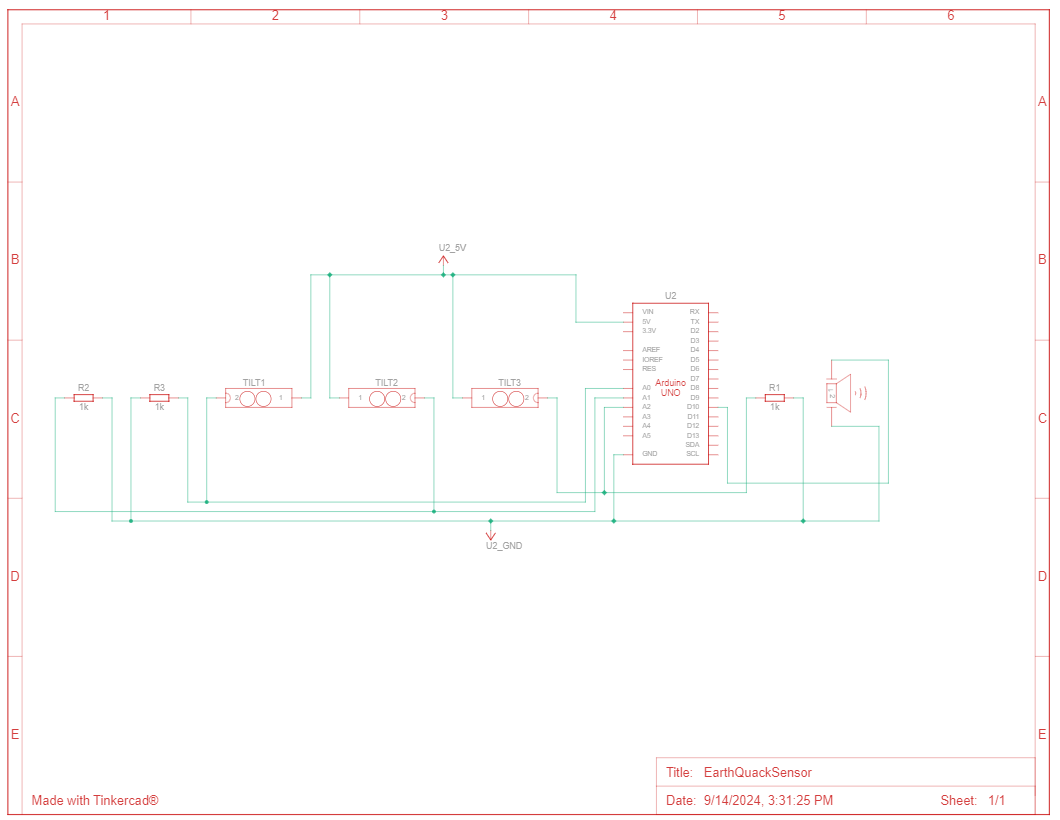

# **Python Code**

Installing all the required packages using pip install.

In [ ]:
pip install pandas matplotlib paho-mqtt openpyxl

Importing required packages in code.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import paho.mqtt.client as mqtt
import io
import json
from datetime import datetime
from scipy import signal

Uploading the excel sheet with seismic (Earthquake) data and loading it into the code.

In [ ]:
def load_seismic_data(file_path):
    from google.colab import files
    uploaded = files.upload()
    # Use the first filename from the uploaded dictionary
    for filename in uploaded:
      # Wrap the bytes content in a BytesIO object
      df = pd.read_excel(io.BytesIO(uploaded[filename]))
      df['Magnitude'] = df['Magnitude'].str.extract(r'(\d+\.?\d*)').astype(float)
      return df

Plotting **Line Graph** for Magnitude vs Origin Time -

In [ ]:
def plot_line(df):
    plt.figure(figsize=(10, 5))
    plt.plot(df['Origin Time'], df['Magnitude'], marker='.', color='b')
    plt.title('Magnitude vs Origin Time')
    plt.xlabel('Origin Time')
    plt.ylabel('Magnitude')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Plotting **Scatter Plot** for Origin Time vs Magnitude -

In [ ]:
def plot_scatter(df):
    plt.figure(figsize=(10, 5))
    plt.scatter(df['Origin Time'], df['Magnitude'], c='r', alpha=0.5)
    plt.title('Origin Time vs Magnitude')
    plt.xlabel('Origin Time')
    plt.ylabel('Magnitude')
    plt.tight_layout()
    plt.show()

Plotting **Spectrogram** for Time vs Frequency -

In [ ]:
def plot_spectrogram(df):
    df['Origin Time'] = pd.to_datetime(df['Origin Time'])
    df = df.sort_values('Origin Time')
    df['Magnitude'] = pd.to_numeric(df['Magnitude'], errors='coerce')
    df = df.dropna(subset=['Magnitude', 'Origin Time'])
    time_diffs = df['Origin Time'].diff().dropna().dt.total_seconds()
    fs = 1 / time_diffs.mean() if not time_diffs.empty else 1.0
    frequencies, times, Sxx = signal.spectrogram(df['Magnitude'], fs)
    Sxx = np.clip(Sxx, a_min=1e-10, a_max=None)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='auto')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [s]')
    plt.title('Spectrogram of Earthquake Magnitudes')
    plt.colorbar(label='Power/Frequency [dB/Hz]')
    plt.show()

Plotting **Histogram** of Magnitude vs Frequency -

In [ ]:
def plot_histogram(df):
    plt.figure(figsize=(10, 6))
    plt.hist(df['Magnitude'], bins=20, color='g', alpha=0.7, edgecolor='black')
    plt.title('Histogram of Magnitude')
    plt.xlabel('Magnitude')
    plt.ylabel('Frequency')
    plt.show()

Plotting **Box Plot** of Magnitude -

In [ ]:
def plot_boxplot(df):
    plt.figure(figsize=(10, 5))
    # Convert 'Magnitude' column to numeric type, handling errors by coercing to NaN
    df['Magnitude'] = pd.to_numeric(df['Magnitude'], errors='coerce')
    plt.boxplot(df['Magnitude'])
    plt.title('Box plot of Magnitude')
    plt.ylabel('Magnitude')
    plt.show()

Publishing data to Iot Platform using MQTT -

In [ ]:
def publish_to_mqtt(df):
    try:
        # Create MQTT Client
        client = mqtt.Client(mqtt.CallbackAPIVersion.VERSION2, "seismic_data_publisher")

        # Define MQTT Broker details
        broker_address = "broker.hivemq.com"
        port = 1883
        topic = "seismic/data"

        # Connect to Broker
        client.connect(broker_address, port)

        # Format the data to JSON
        data = df.to_dict(orient='records')
        json_data = json.dumps(data, default=str)

        # Publish data to the topic
        client.publish(topic, json_data)
        client.disconnect()
    except Exception as e:
        print(f"Error publishing data: {e}")

Initializing main method to call the functions and run the code -

In [ ]:
if __name__ == "__main__":
    # Load the data from the Excel file
    file_path = 'seismic_data.xlsx'
    seismic_data = load_seismic_data(file_path)

    if seismic_data is not None:
        # Convert 'Origin Time' to datetime
        seismic_data.rename(columns=lambda x: x.strip(), inplace=True)
        if 'Origin Time' in seismic_data.columns:
            seismic_data['Origin Time'] = pd.to_datetime(seismic_data['Origin Time'], errors='coerce')

        # Plot the data
        plot_line(seismic_data)
        plot_scatter(seismic_data)
        plot_spectrogram(seismic_data)
        plot_histogram(seismic_data)
        plot_boxplot(seismic_data)

        # Send the data to IoT Platform (via MQTT)
        publish_to_mqtt(seismic_data)
    else:
        print("Data could not be loaded.")


#**Output**

**Output** of the code will look like -

**Line Graph**

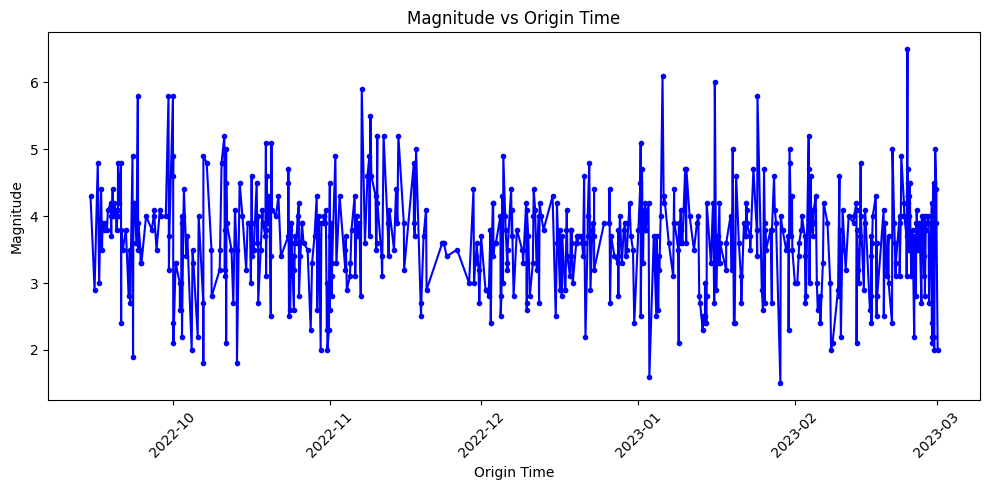

**Scatter Plot**

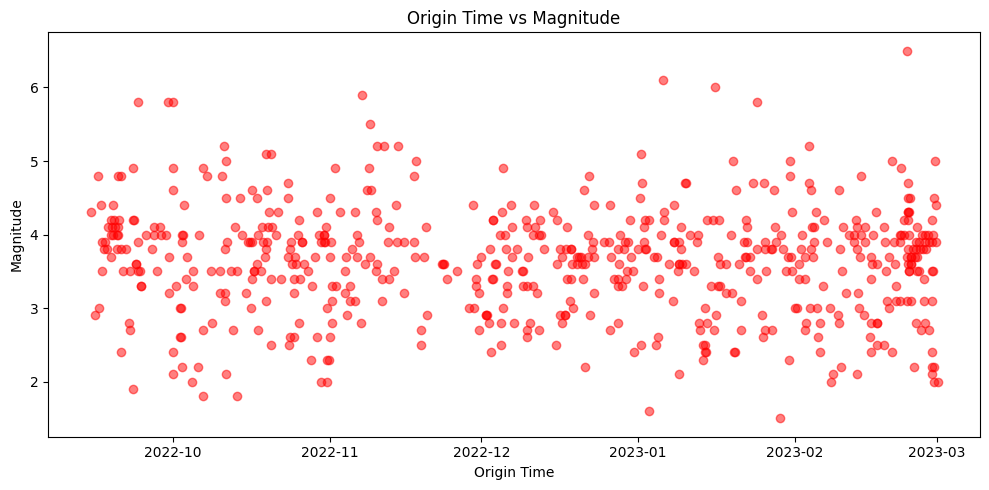

**Spectrogram**

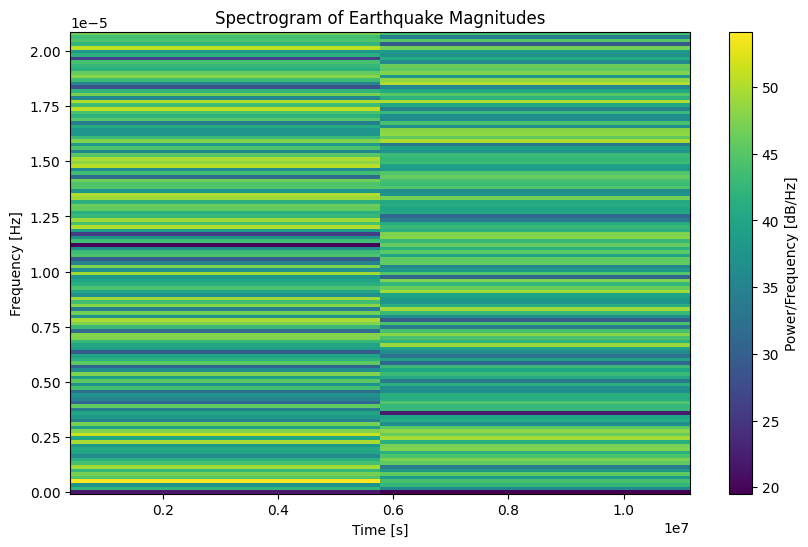

**Histogram**

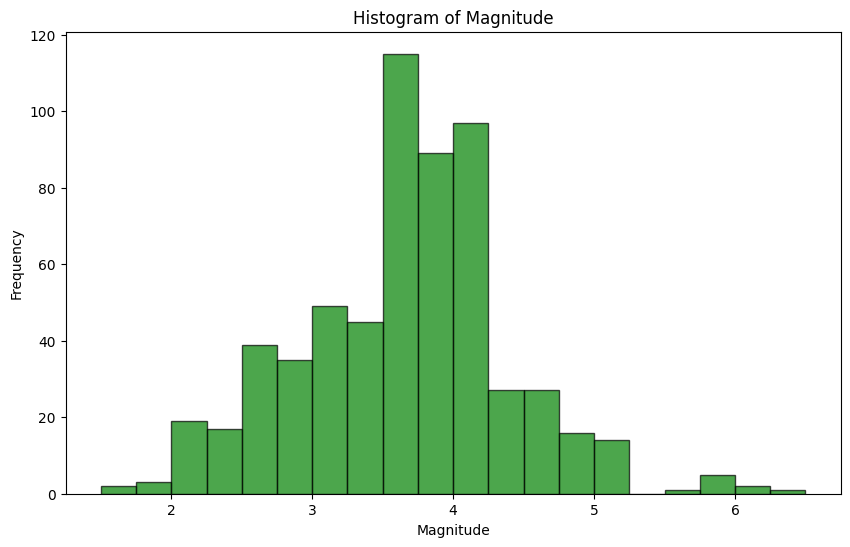

**Box Plot**

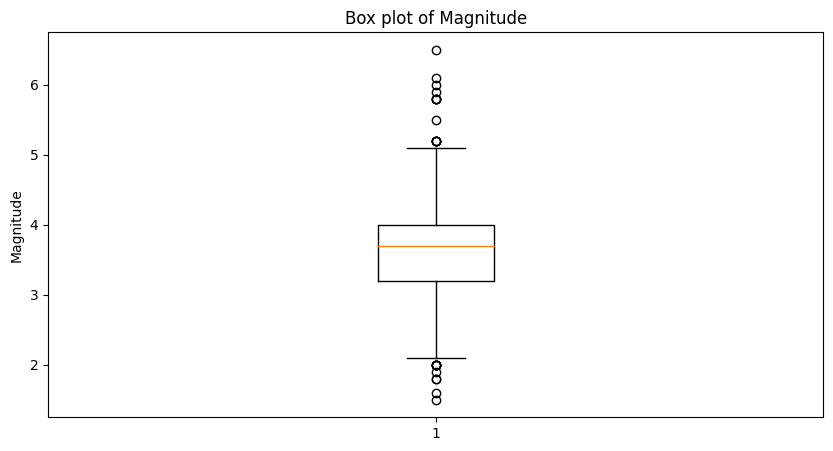